<a href="https://colab.research.google.com/github/wenjie-hoo/baltic_ml/blob/main/baltic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
import pylab
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
oxy = pd.read_csv("./OXY.csv")
tp = pd.read_csv("./TP.csv")
no2 = pd.read_csv("./NO2.csv")

oxy_tp = pd.merge(oxy, tp, how='inner', on=['DATE', 'DEPTH'])
df = pd.merge(oxy_tp, no2, how='left', on=['DATE', 'DEPTH'])
df = df.drop_duplicates()
df = df.dropna(subset=['OXY', 'TP','NO2'])
print(len(df))
df.head()


2446


,DATE,DEPTH,OXY,TP,NO2
1640,07/04/1986,2000,294.3,0.62,0.30
1641,07/04/1986,100,399.7,0.47,0.01
1642,07/04/1986,1000,421.6,0.62,0.01
1643,07/04/1986,2500,245.6,0.69,0.49
1644,07/04/1986,500,352.8,0.42,0.01


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e3d4ecfd0>],
      dtype=object)

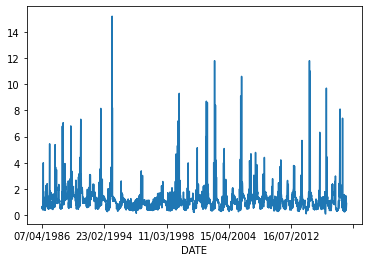

In [5]:
tp_data = df['TP']
tp_data.index = df['DATE']
tp_data.head()
tp_data.plot(subplots=True)

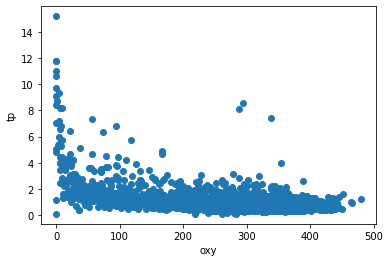

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.scatter(df.iloc[:,2],df.iloc[:,3])
plt.xlabel("oxy")
plt.ylabel("tp")
pylab.show()


In [32]:
X = df.drop(['DATE','DEPTH','NO2'], axis=1)
y = df['NO2']

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 3, random_state=0)

model= DecisionTreeRegressor(max_depth=4)

dtr_fit = model.fit(x_train, y_train)

In [33]:
# df['TP'][2000:] + 1,df['OXY'][2000:] + 50
test_df = df.loc[:, ['OXY', 'TP']][2000:]
test_df['TP']= test_df['TP'] 
test_df['OXY'] = test_df['OXY']
print(test_df)


        OXY    TP
9304  288.7  0.38
9305  283.5  0.37
9306  267.7  0.42
9307  234.5  0.64
9308   95.3  0.77
...     ...   ...
9784  309.6  0.53
9785  322.9  0.53
9786  316.8  0.50
9787  166.4  0.82
9788  143.2  0.88

[446 rows x 2 columns]


In [34]:
ya=dtr_fit.predict(test_df)
# display(pd.DataFrame(ya,columns=['rate']))


X2 = df.drop(['DATE','DEPTH','NO2'], axis=1)
y2 = df[['TP','OXY','NO2']]

x_train2, x_test2, y_train2, y_test2= train_test_split(X2, y2, test_size= 3, random_state=0)

mor = MultiOutputRegressor(XGBRegressor(objective='reg:linear'))

mor.fit(x_train2, y_train2)


pre=mor.predict(test_df)
print(pd.DataFrame(pre,columns=['TP','OXY','NO2']))
pre_df = pd.DataFrame(pre,columns=['TP','OXY','NO2'])

[17:51:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
           TP         OXY       NO2
0    0.380032  288.634155  0.052942
1    0.371802  284.422882  0.052942
2    0.422846  267.318024  0.055630
3    0.636493  234.148972  0.155197
4    0.770949   94.354691  0.145413
..        ...         ...       ...
441  0.525558  309.408997  0.068260
442  0.525558  323.723938  0.078739
443  0.499566  317.088806  0.068260
444  0.817943  165.945465  0.201581
445  0.877633  143.405823  0.204440

[446 rows x 3 columns]


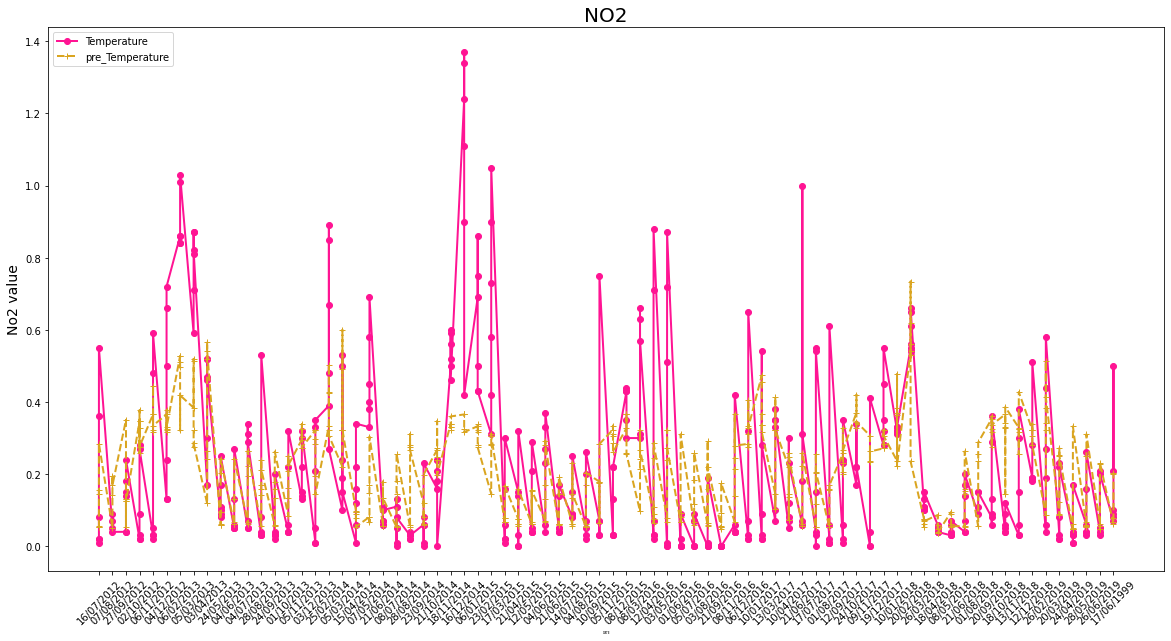

In [51]:
plt.figure(figsize=(20,10))
plt.title('NO2',fontsize=20,)
plt.xlabel('DATE',fontsize=3)
plt.xticks(rotation=45)
plt.ylabel('No2 value',fontsize=14)
 

plt.plot(df['DATE'][2000:],df['NO2'][2000:],color="deeppink",linewidth=2,linestyle='-',label='Temperature', marker='o')
plt.plot(df['DATE'][2000:],pre_df['NO2'],color="goldenrod",linewidth=2,linestyle='--',label='pre_Temperature', marker='+')
 
plt.legend(loc=2)
plt.show()
